In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pip install sqlalchemy
#pip install mysql-connector-python

In [105]:
movies = pd.read_csv('IMDB-Movie-Data.csv')

In [131]:
movies.info() # Cleaned data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         838 non-null    int64  
 1   Title        838 non-null    object 
 2   Genre        838 non-null    object 
 3   Description  838 non-null    object 
 4   Director     838 non-null    object 
 5   Actors       838 non-null    object 
 6   Year         838 non-null    int64  
 7   Runtime      838 non-null    int64  
 8   IMDb_rating  838 non-null    float64
 9   Votes        838 non-null    int64  
 10  Revenue      838 non-null    float64
 11  Metascore    838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [132]:
movies.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore
count,838.000000,838,838,838,838,838,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
unique,NaN,837,189,838,524,834,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,485.247017,NaN,NaN,NaN,NaN,NaN,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,NaN,NaN,NaN,NaN,NaN,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,NaN,NaN,NaN,NaN,NaN,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,NaN,NaN,NaN,NaN,NaN,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,NaN,NaN,NaN,NaN,NaN,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000


In [137]:
movies['Description_len'] = movies['Description'].map(len) # Adding new column using map function to identify the length of each description (will use it to identify does the description length
# have influence on the rating)

In [139]:
def word_count(txt):
    return len(txt.split())

In [147]:
movies['Description_words'] = movies['Description'].map(word_count)
movies.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_len,Description_words
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,127,21
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,127,24


In [155]:
movies['Year'].value_counts() # 2016 was the most popular year for releasing new movies

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

In [159]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               838 non-null    int64  
 1   Title              838 non-null    object 
 2   Genre              838 non-null    object 
 3   Description        838 non-null    object 
 4   Director           838 non-null    object 
 5   Actors             838 non-null    object 
 6   Year               838 non-null    int64  
 7   Runtime            838 non-null    int64  
 8   IMDb_rating        838 non-null    float64
 9   Votes              838 non-null    int64  
 10  Revenue            838 non-null    float64
 11  Metascore          838 non-null    float64
 12  Description_len    838 non-null    int64  
 13  Description_words  838 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 98.2+ KB


In [178]:
movies[(movies['Year'] == 2016) & (movies['IMDb_rating'] >= 8.0)]


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_len,Description_words
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,60,11
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.2,211760,67.12,71.0,205,36
18,19,Lion,"Biography,Drama",A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,51.69,69.0,227,39
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0,166,23
33,34,Deadpool,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108,8.0,627797,363.02,65.0,161,27
74,75,Zootopia,"Animation,Adventure,Comedy","In a city of anthropomorphic animals, a rookie...",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8.1,296853,341.26,78.0,129,23
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0,131,23
145,146,Ah-ga-ssi,"Drama,Mystery,Romance",A woman is hired as a handmaiden to a Japanese...,Chan-wook Park,"Min-hee Kim, Jung-woo Ha, Jin-woong Jo, So-ri ...",2016,144,8.1,33418,2.01,84.0,110,22
184,185,Forushande,"Drama,Thriller","While both participating in a production of ""D...",Asghar Farhadi,"Taraneh Alidoosti, Shahab Hosseini, Babak Kari...",2016,124,8.0,22389,3.40,85.0,205,33
273,274,Sing Street,"Comedy,Drama,Music",A boy growing up in Dublin during the 1980s es...,John Carney,"Ferdia Walsh-Peelo, Aidan Gillen, Maria Doyle ...",2016,106,8.0,52144,3.23,79.0,136,25


In [106]:
print(movies['Director'].value_counts()) # Counting the number that each director appeared in the dataset

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: Director, Length: 644, dtype: int64


In [134]:
print(movies['Genre'].value_counts().idxmax()) # Most popular genre
movies['Genre'].value_counts().idxmin() 

Action,Adventure,Sci-Fi


'Thriller'

In [109]:
movies.isnull().sum() # Finding the number of Null values in the dataset

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [111]:
movies_ch
movies = movies_ch.rename(columns={'Revenue (Millions)' : 'Revenue' }) #Renaming the column
movies_imdb = movies.rename(columns={'Rating' : 'IMDb_rating'})
movies = movies_imdb

In [112]:
movies_ch = movies.rename( columns={'Runtime (Minutes)' : 'Runtime' }) # Renaming the column

In [115]:
movies = movies_no_duplicates = movies.drop_duplicates() # Dropping the duplicates

In [116]:
movies_dropna = movies.dropna(how='any', subset = 'Revenue') # Dropping null values of column 'Revenue'
movies = movies_dropna

In [117]:
movies_nona =movies.dropna(how='any', subset = 'Metascore') # Dropping null values of column 'Metascore' 
movies = movies_nona

In [120]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [118]:
print(movies['Revenue'].mean())
print(movies['Revenue'].min())
print(movies['Revenue'].max())

84.5645584725537
0.0
936.63


In [130]:
movies[movies['Revenue'] == 0] # Movie with less than 1 million of revenue

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.0,50.0


In [128]:
print(movies['Runtime'].mean())
print(movies['IMDb_rating'].mean())
print(movies['Metascore'].mean())
print(movies['Votes'].mean())


114.63842482100239
6.814319809069212
59.575178997613364
193230.25178997614


<AxesSubplot:xlabel='IMDb_rating', ylabel='Metascore'>

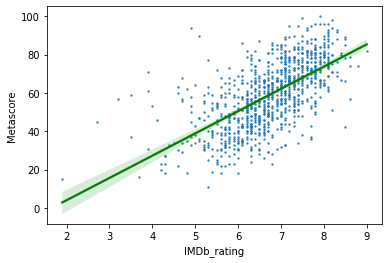

In [71]:
sns.regplot(data=movies, x='IMDb_rating', y='Metascore', scatter_kws={"s": 2}, line_kws={'color': 'green'})

# Positive relationship between two types of ratings, 

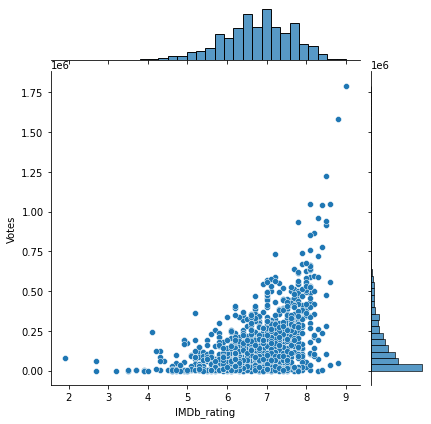

In [75]:
sns.jointplot(data=movies, x='IMDb_rating', y='Votes')

In [101]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    port='3306',
    user='root',
    password='Labutis1997*'
)
cursor = mydb.cursor()
cursor.execute('USE sakila')
df = pd.read_sql('SELECT * FROM actor', con=mydb)
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
...,...,...,...,...
195,196,BELA,WALKEN,2006-02-15 04:34:33
196,197,REESE,WEST,2006-02-15 04:34:33
197,198,MARY,KEITEL,2006-02-15 04:34:33
198,199,JULIA,FAWCETT,2006-02-15 04:34:33
